In [3]:
!pip install factor_analyzer

In [4]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('FA.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [7]:
df.drop(['gender','education','age'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2800 non-null   int64  
 1   A1          2784 non-null   float64
 2   A2          2773 non-null   float64
 3   A3          2774 non-null   float64
 4   A4          2781 non-null   float64
 5   A5          2784 non-null   float64
 6   C1          2779 non-null   float64
 7   C2          2776 non-null   float64
 8   C3          2780 non-null   float64
 9   C4          2774 non-null   float64
 10  C5          2784 non-null   float64
 11  E1          2777 non-null   float64
 12  E2          2784 non-null   float64
 13  E3          2775 non-null   float64
 14  E4          2791 non-null   float64
 15  E5          2779 non-null   float64
 16  N1          2778 non-null   float64
 17  N2          2779 non-null   float64
 18  N3          2789 non-null   float64
 19  N4          2764 non-null  

In [9]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [10]:
# !pip install factor-analyzer
# Instantiate factor analysis object
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.010942  , 2.73339609, 2.10063083, 1.82518774, 1.53044116,
       1.13793896, 0.99075956, 0.84198129, 0.80487533, 0.73643558,
       0.69695867, 0.68195111, 0.66104604, 0.62990575, 0.60124341,
       0.56676166, 0.54336199, 0.52529125, 0.50315316, 0.49349115,
       0.45894593, 0.43600042, 0.41206865, 0.40964281, 0.38825624,
       0.27933322])

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

C:\Users\DELL\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

In [12]:
sorted(ev)

[0.2793332154154979,
 0.3882562383425246,
 0.40964280881996096,
 0.4120686542791454,
 0.4360004197039113,
 0.458945927706405,
 0.49349115351667505,
 0.5031531645595952,
 0.5252912520360216,
 0.5433619941809391,
 0.5667616560563861,
 0.6012434086630891,
 0.629905751894107,
 0.6610460412141302,
 0.6819511058346837,
 0.6969586679158344,
 0.736435576474957,
 0.8048753328583164,
 0.8419812907799554,
 0.9907595576995628,
 1.1379389595458353,
 1.5304411649659133,
 1.8251877371283745,
 2.1006308300039396,
 2.7333960874982655,
 5.010942002905971]

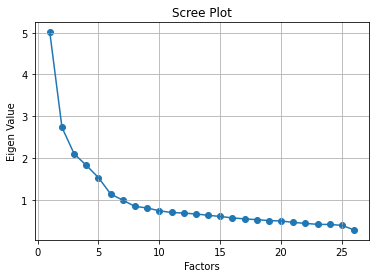

In [13]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [14]:
##fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

                   0         1         2
Unnamed: 0 -0.053543 -0.010124  0.029552
A1         -0.210205  0.111735 -0.024252
A2          0.511838  0.012110  0.150570
A3          0.615141 -0.016007  0.115558
A4          0.370281 -0.085182  0.156645
A5          0.628800 -0.130224  0.101479
C1          0.071387  0.026185  0.572154
C2          0.091003  0.094547  0.616098
C3          0.079831 -0.025627  0.478385
C4         -0.065118  0.240384 -0.606262
C5         -0.148196  0.301370 -0.479725
E1         -0.515573  0.064022  0.017469
E2         -0.580762  0.268486 -0.094705
E3          0.615657  0.019890  0.167499
E4          0.671295 -0.143394  0.041813
E5          0.467400  0.026183  0.353007
N1         -0.050274  0.728952 -0.113559
N2         -0.061790  0.731811 -0.074514
N3         -0.032773  0.743731 -0.092662
N4         -0.235783  0.597734 -0.143479
N5         -0.057726  0.517776 -0.115439
O1          0.257146  0.041123  0.297830
O2          0.008210  0.130704 -0.272594
O3          0.36

In [15]:
fa = FactorAnalyzer(3,rotation='varimax')
fa.fit(df)
loads = fa.loadings_
print(loads)

[[-0.05354253 -0.01012351  0.02955217]
 [-0.21020465  0.11173547 -0.02425161]
 [ 0.51183828  0.01210952  0.15056972]
 [ 0.61514137 -0.0160075   0.11555784]
 [ 0.37028073 -0.08518207  0.15664533]
 [ 0.62880034 -0.13022428  0.10147853]
 [ 0.07138653  0.02618475  0.57215377]
 [ 0.0910026   0.09454727  0.61609842]
 [ 0.07983101 -0.02562732  0.47838489]
 [-0.06511775  0.24038446 -0.60626177]
 [-0.14819603  0.30137022 -0.47972498]
 [-0.5155726   0.0640218   0.01746906]
 [-0.5807624   0.26848562 -0.09470476]
 [ 0.61565707  0.01988958  0.16749867]
 [ 0.67129527 -0.14339376  0.04181324]
 [ 0.46740046  0.02618277  0.35300674]
 [-0.05027378  0.72895231 -0.11355913]
 [-0.06178965  0.73181102 -0.07451427]
 [-0.03277291  0.74373084 -0.09266187]
 [-0.23578287  0.59773414 -0.14347853]
 [-0.05772569  0.51777582 -0.11543946]
 [ 0.25714636  0.04112293  0.29782958]
 [ 0.00820971  0.13070377 -0.27259426]
 [ 0.36158786  0.05857539  0.29459549]
 [-0.00486097  0.26092641  0.1282244 ]
 [-0.07110327  0.03752491

In [16]:
fa=FactorAnalyzer(3)
fa.fit(df)
print(fa.loadings_)

[[-0.0629696  -0.01206258  0.0401532 ]
 [-0.21040805  0.09508058  0.01774369]
 [ 0.51282469  0.06474754  0.07057059]
 [ 0.62701379  0.0414045   0.01364307]
 [ 0.35575977 -0.0447108   0.09615151]
 [ 0.63686908 -0.0747393  -0.01040033]
 [-0.03344846  0.07906129  0.595926  ]
 [-0.01682961  0.153664    0.64311357]
 [-0.00970941  0.01939466  0.49193266]
 [ 0.06372466  0.1895102  -0.61754543]
 [-0.0446703   0.25533358 -0.46515113]
 [-0.54438446  0.02608285  0.11280752]
 [-0.57854301  0.21955256  0.01727527]
 [ 0.6198154   0.0821756   0.07075857]
 [ 0.69248896 -0.08967786 -0.08192543]
 [ 0.42761022  0.09214523  0.29393708]
 [ 0.01543653  0.72748289 -0.06880527]
 [-0.00410355  0.73268309 -0.02519815]
 [ 0.03084585  0.74558303 -0.04884242]
 [-0.18331007  0.57715782 -0.0756836 ]
 [-0.00558987  0.51215843 -0.0818988 ]
 [ 0.21693491  0.08633081  0.27319773]
 [ 0.06973578  0.1111322  -0.28292043]
 [ 0.32910042  0.11198489  0.25245644]
 [-0.01323146  0.2752604   0.15219946]
 [-0.02245803  0.01124008

In [17]:
lmatrix1=pd.DataFrame(fa.loadings_,index=list(df.columns),columns=['Factor 1','Factor 2','Factor 3'])
lmatrix1

,Factor 1,Factor 2,Factor 3
Unnamed: 0,-0.062970,-0.012063,0.040153
A1,-0.210408,0.095081,0.017744
A2,0.512825,0.064748,0.070571
A3,0.627014,0.041405,0.013643
A4,0.355760,-0.044711,0.096152
A5,0.636869,-0.074739,-0.010400
C1,-0.033448,0.079061,0.595926
C2,-0.016830,0.153664,0.643114
C3,-0.009709,0.019395,0.491933
C4,0.063725,0.189510,-0.617545


In [18]:
#['varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort', 'promax', 'oblimin', 'quartimin', 'geomin_obl', None]
#with rotation
fa1=FactorAnalyzer(3,rotation='quartimin')
fa1.fit(df)
print(fa1.loadings_)

[[-0.0614562  -0.01629174  0.03832808]
 [-0.21046026  0.08932593  0.02287644]
 [ 0.51894596  0.07415348  0.07244795]
 [ 0.63102548  0.05711399  0.01571563]
 [ 0.36199634 -0.04187052  0.09084576]
 [ 0.63954141 -0.05824444 -0.0145324 ]
 [-0.00567311  0.04174541  0.58410675]
 [ 0.01340513  0.1144604   0.63440108]
 [ 0.01320568 -0.01132817  0.47946267]
 [ 0.03572622  0.23119065 -0.58924101]
 [-0.06598178  0.28526906 -0.43717171]
 [-0.54191496  0.00519763  0.11122686]
 [-0.58025247  0.20534319  0.02978319]
 [ 0.62654564  0.09448165  0.07366181]
 [ 0.69208481 -0.06741507 -0.08496118]
 [ 0.44375697  0.0856663   0.29125192]
 [ 0.01400671  0.73822164 -0.02386822]
 [-0.00359166  0.74024436  0.01883939]
 [ 0.03046894  0.7556278  -0.00338726]
 [-0.18645021  0.58193416 -0.03944858]
 [-0.00824151  0.5213766  -0.04933631]
 [ 0.23099988  0.07564693  0.27074237]
 [ 0.05717735  0.13147829 -0.26851502]
 [ 0.34284544  0.1057067   0.2520929 ]
 [-0.00556776  0.26773166  0.16426874]
 [-0.03473016  0.02703243

In [19]:
lmatrix2=pd.DataFrame(fa1.loadings_,index=list(df.columns),columns=['Factor 1','Factor 2','Factor 3'])
lmatrix2

,Factor 1,Factor 2,Factor 3
Unnamed: 0,-0.061456,-0.016292,0.038328
A1,-0.210460,0.089326,0.022876
A2,0.518946,0.074153,0.072448
A3,0.631025,0.057114,0.015716
A4,0.361996,-0.041871,0.090846
A5,0.639541,-0.058244,-0.014532
C1,-0.005673,0.041745,0.584107
C2,0.013405,0.114460,0.634401
C3,0.013206,-0.011328,0.479463
C4,0.035726,0.231191,-0.589241


In [20]:
fa.get_factor_variance()

(array([3.1174718 , 2.55180151, 2.06615268]),
 array([0.11990276, 0.09814621, 0.07946741]),
 array([0.11990276, 0.21804897, 0.29751638]))